<a href="https://colab.research.google.com/github/PranjalChaudhary/Seoul-Bike_Sharing_Demand_Prediction/blob/main/Pranjal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [684]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math


In [685]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [686]:
#Loading the dataset
file_path ='/content/drive/MyDrive/Bike_Sharing_Demand_Prediction/Dataset_and_Problem_Statement/SeoulBikeData.csv'
df=pd.read_csv(file_path,encoding='latin1')

In [687]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [688]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [689]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [690]:
df[df.duplicated()].count()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [691]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Month'] = df['Date'].dt.month
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11


In [692]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


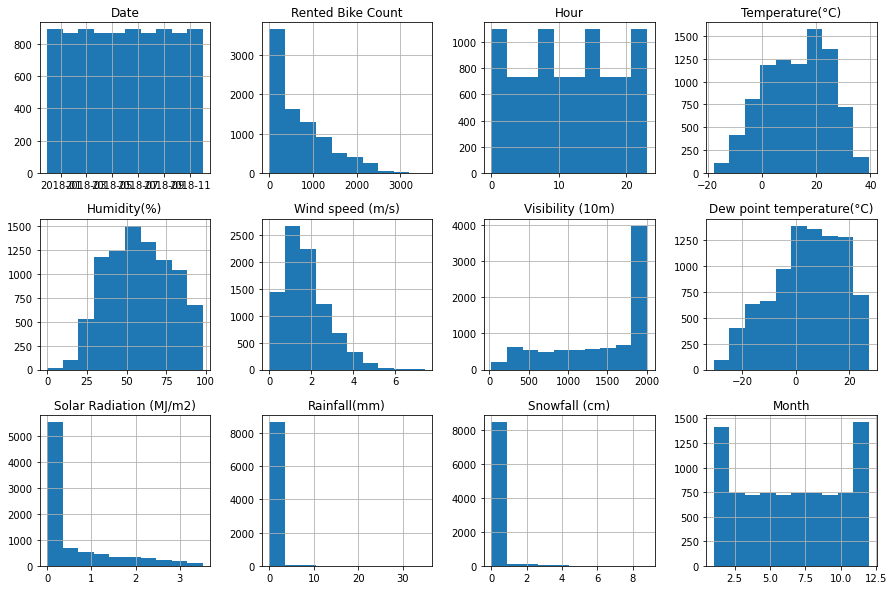

In [693]:
plt.rcParams["figure.figsize"] = [17, 17]      
df.hist(layout=(3,4), figsize=(15,10))
plt.show()

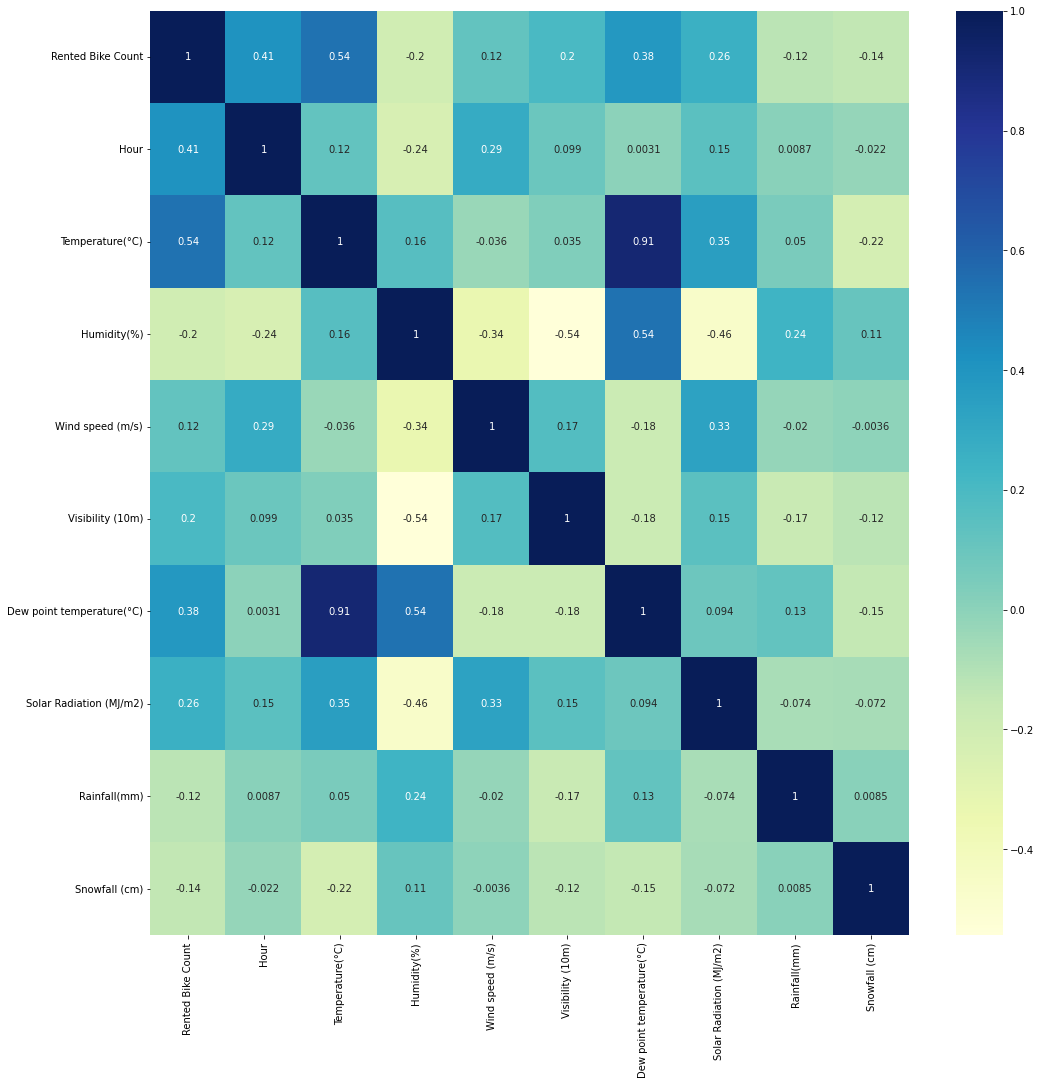

In [694]:
heatmap=sns.heatmap(df.drop(["Date","Month","Holiday","Functioning Day"],axis=1).corr(),cmap="YlGnBu",annot=True)

In [695]:
df.drop(['Dew point temperature(°C)'],axis = 1, inplace =True)

In [696]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day', 'Month'],
      dtype='object')

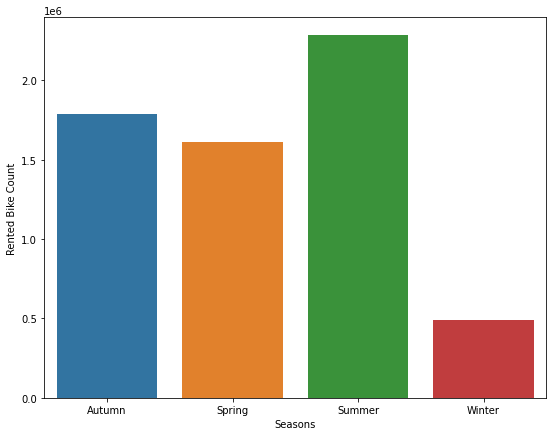

In [697]:
season_bikerent =  pd.DataFrame(df.groupby('Seasons',as_index = False)['Rented Bike Count'].sum()) 


plt.rcParams["figure.figsize"] = [9, 7] 
sns.barplot(x="Seasons",y="Rented Bike Count",data=season_bikerent)
plt.show()

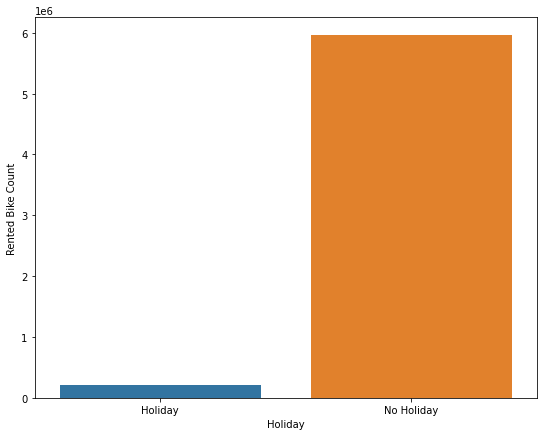

In [698]:
holiday_bikerent =  pd.DataFrame(df.groupby('Holiday',as_index = False)['Rented Bike Count'].sum())
sns.barplot(x="Holiday",y="Rented Bike Count",data=holiday_bikerent)
plt.show()

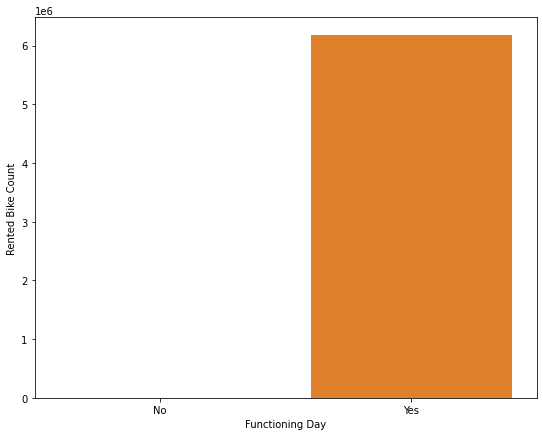

In [699]:
func_day_bikerent =  pd.DataFrame(df.groupby('Functioning Day',as_index = False)['Rented Bike Count'].sum())
sns.barplot(x="Functioning Day",y="Rented Bike Count",data=func_day_bikerent)
plt.show()

In [700]:
def day_time_encoder(hour):
  if (20 <= hour <= 23) or (0 <= hour <=3):
    return "night"
  elif (4<= hour <=11):
    return 'morning'
  elif (12<= hour <=16):
    return 'afternoon'
  else:
    return 'evening'

df['daytime'] = df.Hour.apply(day_time_encoder)
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,daytime
0,2017-12-01,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,night
1,2017-12-01,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,night
2,2017-12-01,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,night
3,2017-12-01,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,night
4,2017-12-01,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,evening
8756,2018-11-30,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,night
8757,2018-11-30,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,night
8758,2018-11-30,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,night


In [701]:
def type_of_day(date):
  if date.day_name() == "Saturday" or date.day_name == "Sunday":
    return "weekend"
  else:
    return "weekday"

df["day_type"]= df.Date.apply(type_of_day)

In [702]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,daytime,day_type
0,2017-12-01,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,night,weekday
1,2017-12-01,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,night,weekday
2,2017-12-01,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,night,weekday
3,2017-12-01,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,night,weekday
4,2017-12-01,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,morning,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,evening,weekday
8756,2018-11-30,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,night,weekday
8757,2018-11-30,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,night,weekday
8758,2018-11-30,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,night,weekday


In [703]:
df = pd.get_dummies(df,columns = ['Functioning Day','Holiday','day_type','Seasons'])
df.drop(['Functioning Day_No','Holiday_No Holiday','day_type_weekday','Seasons_Summer','Seasons_Winter'],axis=1,inplace=True)

In [704]:
#df.drop(["Hour"],axis=1,inplace=True)
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Month', 'daytime',
       'Functioning Day_Yes', 'Holiday_Holiday', 'day_type_weekend',
       'Seasons_Autumn', 'Seasons_Spring'],
      dtype='object')

In [705]:
df.drop(['Month','daytime','Date'],axis=1,inplace =True)


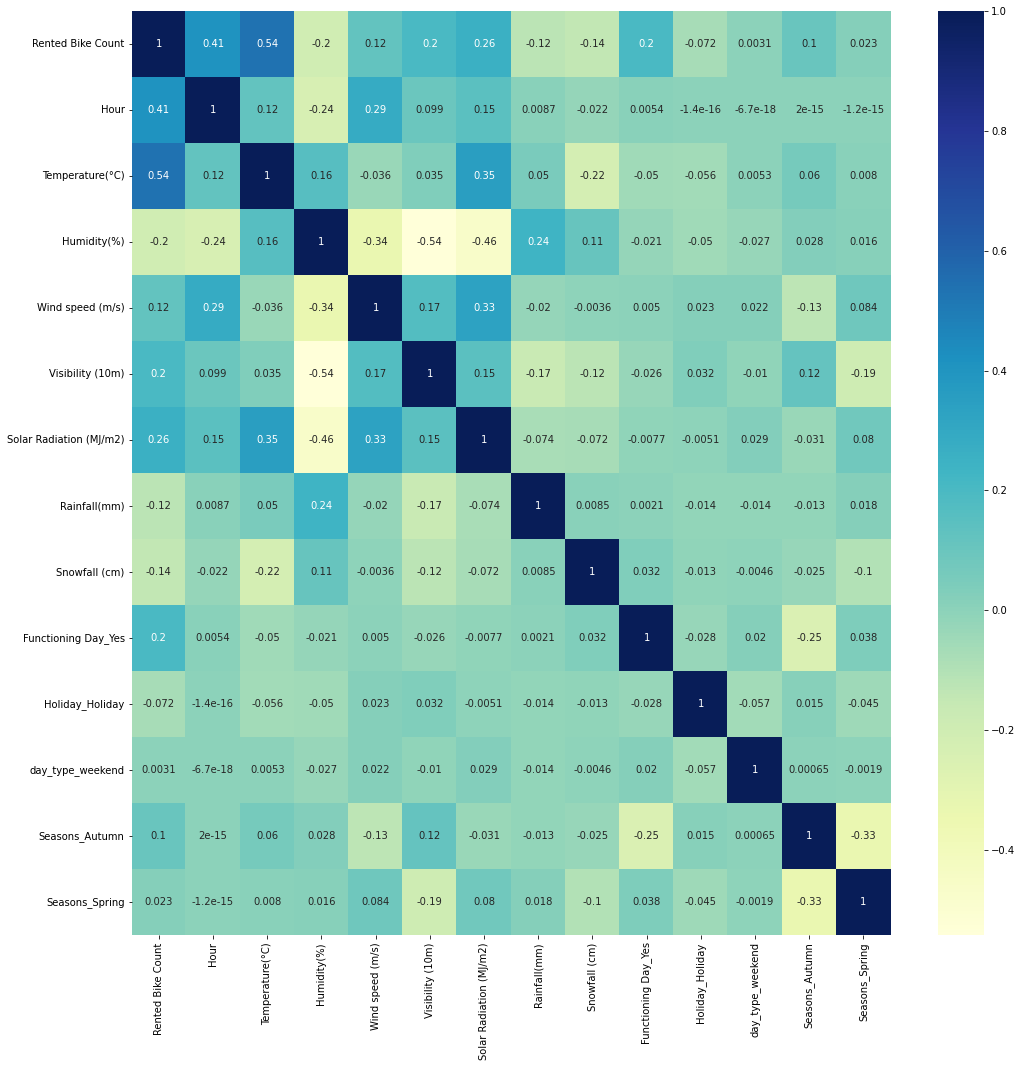

In [706]:
plt.rcParams["figure.figsize"] = [17, 17] 
heatmap = sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)

In [707]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Functioning Day_Yes      8760 non-null   uint8  
 10  Holiday_Holiday          8760 non-null   uint8  
 11  day_type_weekend         8760 non-null   uint8  
 12  Seasons_Autumn           8760 non-null   uint8  
 13  Seasons_Spring           8760 non-null   uint8  
dtypes: float64(5), int64(4),

In [708]:
dependent_variable = 'Rented Bike Count'


In [709]:
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
independent_variables

['Hour',
 'Visibility (10m)',
 'Holiday_Holiday',
 'Snowfall (cm)',
 'Solar Radiation (MJ/m2)',
 'Temperature(°C)',
 'Wind speed (m/s)',
 'Seasons_Autumn',
 'Seasons_Spring',
 'Functioning Day_Yes',
 'Rainfall(mm)',
 'Humidity(%)',
 'day_type_weekend']

In [710]:
# Create the data of independent variables
X = df[independent_variables].values

# Create the dependent variable data
y =np.sqrt(df[dependent_variable].values)

In [711]:
X

array([[0.000e+00, 2.000e+03, 0.000e+00, ..., 0.000e+00, 3.700e+01,
        0.000e+00],
       [1.000e+00, 2.000e+03, 0.000e+00, ..., 0.000e+00, 3.800e+01,
        0.000e+00],
       [2.000e+00, 2.000e+03, 0.000e+00, ..., 0.000e+00, 3.900e+01,
        0.000e+00],
       ...,
       [2.100e+01, 1.968e+03, 0.000e+00, ..., 0.000e+00, 3.900e+01,
        0.000e+00],
       [2.200e+01, 1.859e+03, 0.000e+00, ..., 0.000e+00, 4.100e+01,
        0.000e+00],
       [2.300e+01, 1.909e+03, 0.000e+00, ..., 0.000e+00, 4.300e+01,
        0.000e+00]])

In [712]:
y

array([15.93737745, 14.28285686, 13.15294644, ..., 26.34387974,
       26.68332813, 24.16609195])

In [713]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [714]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [715]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [716]:
regressor.intercept_

-21.533898638801055

In [717]:
regressor.coef_

array([ 10.83186403,   0.9594605 ,  -3.27654124,  -0.17628562,
        -3.34239105,  34.63684018,   0.72578963,   5.0995278 ,
         2.40024909,  28.76128868, -52.31116441, -14.35449788,
        -0.32611796])

In [718]:
y_pred_train = regressor.predict(X_train)

In [719]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([18.39679101, 26.53591905, 19.5806223 , ..., 14.85994937,
       32.55183634, 20.66515874])

In [720]:
y_test

array([17.88854382, 24.08318916, 15.03329638, ..., 14.59451952,
       36.48287269, 27.98213716])

In [721]:
mean_squared_error(y_test, y_pred)

55.39358171921218

In [722]:
math.sqrt(mean_squared_error(y_train, y_pred_train))

7.378172632511259

In [723]:
#Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

7.4426864584780255

In [724]:
r2_score(y_train, y_pred_train)

0.6472731811609684

In [725]:
r2_score(y_test, y_pred)

0.6482640281634138